In [1]:
import torch

import torchvision

from torchvision import datasets, transforms


In [2]:
pip insta
ll --upgrade torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━

In [3]:
import torch
print(torch.__version__)


2.4.0


In [ ]:
#!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#!python pytorch-xla-env-setup.py --version nightly --apt-packages libomp5 libopenblas-dev

In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [5]:
#from google.colab import drive

from PIL import Image

import os

In [ ]:
#drive.mount('/content/drive')

In [6]:
dataset_path = '/kaggle/input/tumor-trace-project-dataset'


In [8]:
from torch.utils.data import Dataset

**loading custom dataset**

In [9]:
class BreastCancerDataset(Dataset):

    def __init__(self, dataset_path, transform=None):

        self.dataset_path = dataset_path

        self.transform = transform

        self.samples = self._load_samples()



        # Debug: Print the number of samples loaded

        print(f"Number of samples found: {len(self.samples)}")

        if len(self.samples) == 0:

            raise ValueError(f"No valid samples found in {self.dataset_path}")



    def _load_samples(self):

        # List all image files in the directory structure and assign labels

        samples = []

        for label in ['Benign', 'Malignant']:

            label_dir = os.path.join(self.dataset_path, label)

            if not os.path.exists(label_dir):

                continue

            for root, _, files in os.walk(label_dir):

                for file in files:

                    if file.lower().endswith(('.jpg', '.png', '.jpeg')):

                        file_path = os.path.join(root, file)

                        samples.append((file_path, 0 if label == 'Benign' else 1))  # 0 for Benign, 1 for Malignant

        return samples



    def __len__(self):

        return len(self.samples)



    def __getitem__(self, idx):

        image_path, label = self.samples[idx]

        image = Image.open(image_path).convert('RGB')  # Load the image

        if self.transform:

            image = self.transform(image)

        return image, label




In [ ]:
from torch.utils.data import Dataset, DataLoader

# Define the transform

transform = transforms.Compose([

    transforms.Resize((224, 224)),

    transforms.ToTensor(),

])



# Create the dataset and dataloader for each split (train, test, val)

train_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-dataset/train', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



test_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-dataset/test', transform=transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



val_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-dataset/val', transform=transform)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



# Example: Iterate through the train_loader to see some batches

for images, labels in train_loader:

    print(images.size(), labels)  # Print the size of the batch and the labels

    break  # Just show the first batch


In [ ]:
from skimage import color, exposure

from skimage.feature import hog, corner_harris, corner_peaks # Import corner_harris and corner_peaks

from skimage import color, exposure

from skimage.feature import hog, corner_harris, corner_peaks # Import corner_harris and corner_peaks








In [ ]:
Define transformations for the train, test, and validation datasets


In [10]:
# Define transformations for the train, test, and validation datasets

train_transforms = transforms.Compose([

    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flip the image horizontally with a probability of 0.5

    transforms.RandomRotation(degrees=15),     # Randomly rotate the image by 15 degrees

    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)), # Random crop and resize

    transforms.ToTensor(),                     # Convert to tensor

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet mean and std

])

In [11]:
test_transforms = transforms.Compose([

    transforms.Resize(224),                    # Resize the image to 256x256

    transforms.CenterCrop(224),                # Center crop to 224x224

    transforms.ToTensor(),                     # Convert to tensor

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet mean and std

])

In [12]:
val_transforms = transforms.Compose([

    transforms.Resize(224),

    transforms.CenterCrop(224),

    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [13]:
from torch.utils.data import DataLoader


In [14]:
# Create the dataset and dataloader for each split (train, test, val)

train_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-project-dataset/train', transform = train_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)



test_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-project-dataset/test', transform = test_transforms)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



val_dataset = BreastCancerDataset('/kaggle/input/tumor-trace-project-dataset/val', transform = val_transforms)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



# Example: Iterate through the train_loader to see some batches

for images, labels in train_loader:

    print(images.size(), labels)  # Print the size of the batch and the labels

    break  # Just show the first batch


Number of samples found: 20434
Number of samples found: 6851
Number of samples found: 1989
torch.Size([32, 3, 224, 224]) tensor([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1])


In [67]:
import torch

import torchvision.models as models
# Load the VGG-16 model pre-trained on ImageNet
vgg16 = models.vgg16(pretrained=True)
# Set the model to evaluation mode

vgg16.eval()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
import torch
import torchvision.models as models

# For ResNet18
resnet18 = models.resnet18(pretrained=True)
resnet18.eval()  # Set the model to evaluation mode
print("ResNet18 Model:")
print(resnet18)



/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]

ResNet18 Model:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(

In [18]:
import torch

import torch.nn as nn

import torchvision.models as models

class Resnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet18, self).__init__()
        model_resnet18 = models.resnet18(pretrained=True)
        self.conv1 = model_resnet18.conv1  # convolutional function
        self.bn1 = model_resnet18.bn1  # batch normalization
        self.relu = model_resnet18.relu  # relu is your activation function.
        self.maxpool = model_resnet18.maxpool  # maxpool is basically taking the biggest value per
        
        # sub_matrix
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4  # these layers are used for deepening the layers in the architecture which will increase
        
        self.avgpool = model_resnet18.avgpool
        self.features = model_resnet18.fc.in_features
        self.fc = nn.Linear(self.features, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [19]:
model = Resnet18()

print(model)

Resnet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


In [34]:
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = models.resnet50(pretrained=True)
        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.features = model_resnet50.fc.in_features
        self.fc = nn.Linear(self.features, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [35]:
model = Resnet50()

print(model)

Resnet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

**Model training**

In [68]:
import torch

import torch.nn as nn

import torchvision.models as models



class customVGG16(nn.Module):

    def __init__(self, num_classes=2):

        super(customVGG16, self).__init__()



        # Load the pre-trained VGG16 model

        vgg16 = models.vgg16(pretrained=True)



        # Extract features and avgpool layers

        self.features = vgg16.features

        self.avgpool = vgg16.avgpool



        # Define a new classifier

        self.classifier = nn.Sequential(

            nn.Linear(512 * 7 * 7, 4096),  # Linear layer with input size 512 7 7 and output size 4096

            nn.ReLU(),                    # ReLU activation function

            nn.Dropout(),                 # Dropout

            nn.Linear(4096, 4096),         # Another linear layer with input size 4096 and output size 4096

            nn.ReLU(),                    # ReLU activation

            nn.Dropout(),                 # Dropout layer

            nn.Linear(4096, num_classes)  # Final Linear layer with output size equal to number of classes

        )



    # Forward Method (Make sure this is outside the __init__ method)

    def forward(self, x):

        # Pass input through the features layer

        x = self.features(x)

        # Pass through the AVGpool layer

        x = self.avgpool(x)

        # Reshape output to a 2D tensor

        x = torch.flatten(x, 1)

        # Pass through the classifier

        x = self.classifier(x)



        return x


In [69]:
model = customVGG16()

print(model)

customVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [70]:
import numpy as np

import torch



class EarlyStopping:

    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):



        self.patience = patience

        self.verbose = verbose

        self.delta = delta

        self.path = path

        self.trace_func = trace_func



        self.counter = 0

        self.best_score = None

        self.early_stop = False

        self.val_loss_min = np.Inf



    def __call__(self, val_loss, model):

        score = -val_loss



        # Initialize best_score if not set, and check for improvement

        if self.best_score is None:

            self.best_score = score

            self.save_checkpoint(val_loss, model)

        elif score < self.best_score + self.delta:

            self.counter += 1

            if self.verbose:

                self.trace_func(f"EarlyStopping counter: {self.counter} out of {self.patience}")

            if self.counter >= self.patience:

                self.early_stop = True

        else:

            self.best_score = score

            self.save_checkpoint(val_loss, model)

            self.counter = 0



    def save_checkpoint(self, val_loss, model):

        """Saves model when validation loss decreases."""

        if self.verbose:

            self.trace_func(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")

        torch.save(model.state_dict(), self.path)

        self.val_loss_min = val_loss


training the VGG16 model

In [57]:
import torch



import torch.nn.functional as F



from tqdm import tqdm



import torch.optim as optim



from tqdm import tqdm

In [58]:
#no_cuda = not torch.cuda.is_available()  # Set to True if CUDA is not available

#device = torch.device("cuda" if torch.cuda.is_available() and not no_cuda else "cpu")

#print(f"Using device: {device}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)



#device = torch.device("cpu")

In [59]:
import torch
import torch.nn.functional as F
#from tqdm import tqdm #already imported in previous cell
import torch.optim as optim
#from tqdm import tqdm  #already imported in previous cell

# Get the CPU device

#device = torch.device("cpu")

#print(f"Using device: {device}")

# ... rest of your code using 'device' for tensors ...

In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

train function

In [71]:
import torch
from tqdm import tqdm
import torch.nn.functional as F

epoch = 0

total_epochs = 50

loader = train_loader  # Ensure this is a DataLoader instance for training data

criterion = nn.CrossEntropyLoss()

l2_decay = 0.01

lr = 0.01  # Learning rate



def train(epoch, model, num_epochs, loader, criterion, l2_decay):

    learing_rate = max(lr*(0.1**(epoch//10)),1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr= learing_rate, momentum=0.9, weight_decay=l2_decay)

    model.train()

    correct = 0
    for data, label in tqdm(loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        data = data.float().cuda()

        label = label.long().cuda()

        output = model(data)
        optimizer.zero_grad()
        loss = F.nll_loss(F.log_softmax(output, dim=1), label)
        loss.backward()
        optimizer.step()

        pred = output.data.max(1)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()

    print(f'train accuracy: {100. * correct / len(loader.dataset)}%')



In [72]:
from sklearn.metrics import roc_curve, auc as compute_auc  # Rename the imported 'auc' function
import sklearn.metrics as metrics

def validation(model, val_loader):
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    all_predictions = []  # Store all predictions
    all_targets = []  # Store all targets
    possibilities = None  # Store probabilities for AUC

    for data, target in val_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        val_output = model(data)

        # Calculate test loss
        test_loss += F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()

        # Get predictions and accumulate them
        pred = val_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())  # Collect all predictions
        all_targets.extend(target.cpu().numpy())  # Collect all target labels

        # Calculate probabilities for AUC
        possibility = F.softmax(val_output, dim=1).cpu().detach().numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        # Calculate the number of correct predictions
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Compute confusion matrix
    cm = metrics.confusion_matrix(all_targets, all_predictions)

    # One-hot encode the labels for AUC computation
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_score = compute_auc(fpr, tpr)  # Use 'compute_auc' to avoid conflicts

    # Average test loss per sample
    test_loss /= len(val_loader.dataset)

    # Calculate specificity and sensitivity
    specificity = 1 - fpr[1] if len(fpr) > 1 else 0
    sensitivity = tpr[1] if len(tpr) > 1 else 0

    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(specificity, sensitivity, auc_score))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(test_loss, 100. * correct / len(val_loader.dataset)))

    return test_loss, 100. * correct / len(val_loader.dataset), cm, auc_score


In [73]:
total_epochs = 50

lr = 0.01

momentum = 0.9

no_cuda = False

num_classes=2

log_interval = 10

l2_decay = 0.01

model = customVGG16(num_classes=num_classes)

model = model.to(device)



criterion = nn.CrossEntropyLoss()

In [74]:
import os
from IPython.display import FileLink

# Model training
model.to(device)  

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)

project_name = 'tumor_classification'
model_name = 'vgg16'

# Set Kaggle working directory
os.chdir(r'/kaggle/working')

for epoch in range(1, total_epochs + 1):
    # Training step
    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)

    # Validation step
    with torch.no_grad():
        test_loss, accuracy, cm, auc = validation(model, val_loader)

    # Handle model state for single/multiple GPUs
    model_state_dict = model.module.state_dict() if isinstance(model, nn.parallel.DistributedDataParallel) else model.state_dict()

    # Save directory for models
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    # Early stopping check
    early_stop(test_loss, model)

    # Save the best model based on AUC
    if auc > best_accuracy:
        best_accuracy = auc
        model_save_path = os.path.join(model_save_dir, f'{model_name}_epoch_{epoch}.pth')
        torch.save(model_state_dict, model_save_path, _use_new_zipfile_serialization=False)
        print(f"Model saved at: {os.path.abspath(model_save_path)}")

        # Generate download link for Kaggle
        print("Generating download link for the saved model...")
        display(FileLink(model_save_path))

    # Stop training if early stopping is triggered
    if early_stop.early_stop:
        print("Early stopping")
        break

# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model_state_dict, final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")

# Generate download link for the final model
print("Generating download link for the final model...")
display(FileLink(final_model_save_path))


Epoch 2/50: 100%|██████████| 639/639 [04:00<00:00,  2.66batch/s]


train accuracy: 77.22423553466797%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9151

Test set: Average loss: 0.3936, Accuracy: 81.80%

Validation loss decreased (inf --> 0.393575). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/vgg16/vgg16_epoch_1.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/vgg16/vgg16_epoch_1.pth

Epoch 3/50: 100%|██████████| 639/639 [03:38<00:00,  2.92batch/s]


train accuracy: 79.17196655273438%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8833

Test set: Average loss: 0.4406, Accuracy: 78.93%

EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 78.99578857421875%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8945

Test set: Average loss: 0.4294, Accuracy: 78.78%

EarlyStopping counter: 2 out of 20


Epoch 5/50: 100%|██████████| 639/639 [03:39<00:00,  2.91batch/s]


train accuracy: 79.07898712158203%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8783

Test set: Average loss: 0.4792, Accuracy: 76.02%

EarlyStopping counter: 3 out of 20


Epoch 6/50: 100%|██████████| 639/639 [03:38<00:00,  2.92batch/s]


train accuracy: 78.61407470703125%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8573

Test set: Average loss: 0.4630, Accuracy: 76.42%

EarlyStopping counter: 4 out of 20


Epoch 7/50: 100%|██████████| 639/639 [03:38<00:00,  2.93batch/s]


train accuracy: 77.62063598632812%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8685

Test set: Average loss: 0.4560, Accuracy: 78.83%

EarlyStopping counter: 5 out of 20


Epoch 8/50:  59%|█████▉    | 379/639 [02:09<01:29,  2.92batch/s]

Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8931

Test set: Average loss: 0.4365, Accuracy: 79.39%

EarlyStopping counter: 6 out of 20


Epoch 9/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 77.71361541748047%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8906

Test set: Average loss: 0.4625, Accuracy: 78.18%

EarlyStopping counter: 7 out of 20


Epoch 10/50: 100%|██████████| 639/639 [03:36<00:00,  2.95batch/s]


train accuracy: 76.79846954345703%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7060

Test set: Average loss: 0.6269, Accuracy: 61.14%

EarlyStopping counter: 8 out of 20


Epoch 11/50: 100%|██████████| 639/639 [03:35<00:00,  2.96batch/s]


train accuracy: 80.08711242675781%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8699

Test set: Average loss: 0.4456, Accuracy: 76.17%

EarlyStopping counter: 9 out of 20


Epoch 12/50: 100%|██████████| 639/639 [03:36<00:00,  2.95batch/s]


train accuracy: 80.30243682861328%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8408

Test set: Average loss: 0.4892, Accuracy: 74.16%

EarlyStopping counter: 10 out of 20


Epoch 13/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 80.78202819824219%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8190

Test set: Average loss: 0.5137, Accuracy: 72.10%

EarlyStopping counter: 11 out of 20


Epoch 14/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 81.13438415527344%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8230

Test set: Average loss: 0.5095, Accuracy: 73.25%

EarlyStopping counter: 12 out of 20


Epoch 15/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 81.41822814941406%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8821

Test set: Average loss: 0.4225, Accuracy: 78.28%

EarlyStopping counter: 13 out of 20


Epoch 16/50: 100%|██████████| 639/639 [03:38<00:00,  2.93batch/s]


train accuracy: 81.5650405883789%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8403

Test set: Average loss: 0.4923, Accuracy: 76.32%

EarlyStopping counter: 14 out of 20


Epoch 17/50: 100%|██████████| 639/639 [03:33<00:00,  2.99batch/s]


train accuracy: 81.59439849853516%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8901

Test set: Average loss: 0.4176, Accuracy: 78.93%

EarlyStopping counter: 15 out of 20


Epoch 18/50: 100%|██████████| 639/639 [03:34<00:00,  2.98batch/s]


train accuracy: 81.73632049560547%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8415

Test set: Average loss: 0.4893, Accuracy: 73.86%

EarlyStopping counter: 16 out of 20


Epoch 19/50: 100%|██████████| 639/639 [03:39<00:00,  2.91batch/s]


train accuracy: 81.86356353759766%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8442

Test set: Average loss: 0.4845, Accuracy: 75.62%

EarlyStopping counter: 17 out of 20


Epoch 20/50: 100%|██████████| 639/639 [03:37<00:00,  2.93batch/s]


train accuracy: 81.92228698730469%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8863

Test set: Average loss: 0.4232, Accuracy: 78.43%

EarlyStopping counter: 18 out of 20


Epoch 21/50: 100%|██████████| 639/639 [03:37<00:00,  2.94batch/s]


train accuracy: 83.05764770507812%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8656

Test set: Average loss: 0.4510, Accuracy: 76.77%

EarlyStopping counter: 19 out of 20


Epoch 22/50: 100%|██████████| 639/639 [03:36<00:00,  2.95batch/s]


train accuracy: 82.94020080566406%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8669

Test set: Average loss: 0.4494, Accuracy: 77.58%

EarlyStopping counter: 20 out of 20
Early stopping
Final model saved at: /kaggle/working/model/tumor_classification/vgg16/vgg16_final_epoch.pth
Generating download link for the final model...


/kaggle/working/model/tumor_classification/vgg16/vgg16_final_epoch.pth

In [75]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve

import torch

import numpy as np

import torch.nn.functional as F



def test(model, test_loader):
    name = 'test'
    len_test_loader = len(test_loader.dataset)
    model.eval()

    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    true_labels = []  # Collect true labels here
    class_names = ['benign', 'malignant']

    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())  # Collect predictions
        true_labels.extend(target.cpu().numpy())  # Collect true labels

        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Ensure all_predictions and true_labels are flattened
    all_predictions = np.array(all_predictions)
    true_labels = np.array(true_labels)

    # Classification metrics -> accuracy, F1 score
    print(metrics.classification_report(true_labels, all_predictions, target_names=class_names, digits=4))

    # Confusion matrix
    cm = metrics.confusion_matrix(true_labels, all_predictions)
    print("\nConfusion Matrix:\n", cm)

    # ROC Curve and AUC
    num_classes = len(class_names)
    label_onehot = np.eye(num_classes)[true_labels.astype(int)]
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Specificity, Sensitivity, AUC
    test_loss /= len_test_loader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_loader, 100. * correct / len_test_loader))

    #return 100. * correct / len_test_loader, test_loss, auc_value
    return 100. * correct / len_test_loader, test_loss, auc_value, fpr, tpr



In [76]:
test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.5640    0.5186    0.5403      1938
   malignant     0.8159    0.8418    0.8287      4913

    accuracy                         0.7504      6851
   macro avg     0.6900    0.6802    0.6845      6851
weighted avg     0.7447    0.7504    0.7471      6851


Confusion Matrix:
 [[1005  933]
 [ 777 4136]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7824

test set: Average loss: 0.5217, Accuracy: 5141/6851 (75.04%)



(tensor(75.0401),
 0.5216683387765048,
 0.7824413105896049,
 array([0.        , 0.        , 0.        , ..., 0.98773902, 0.98773902,
        1.        ]),
 array([0.00000000e+00, 1.45964093e-04, 1.22609838e-02, ...,
        9.99708072e-01, 1.00000000e+00, 1.00000000e+00]))

In [77]:
test_accuracy, test_loss, test_auc, fpr, tpr = test(model, test_loader)



              precision    recall  f1-score   support

      benign     0.5640    0.5186    0.5403      1938
   malignant     0.8159    0.8418    0.8287      4913

    accuracy                         0.7504      6851
   macro avg     0.6900    0.6802    0.6845      6851
weighted avg     0.7447    0.7504    0.7471      6851


Confusion Matrix:
 [[1005  933]
 [ 777 4136]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7824

test set: Average loss: 0.5217, Accuracy: 5141/6851 (75.04%)



In [78]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()   

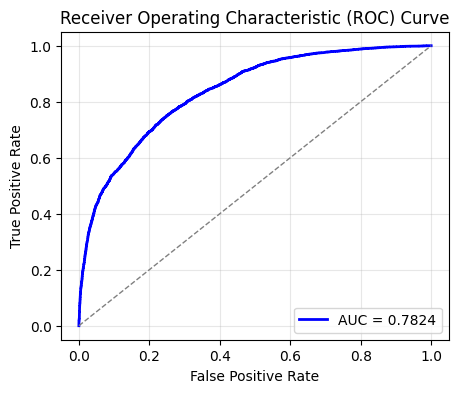

In [79]:
plot_auc(fpr, tpr, test_auc)

In [80]:
import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


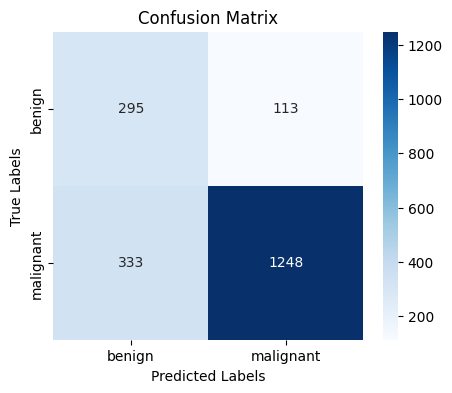

In [81]:
plot_confusion_matrix(cm, class_names=['benign', 'malignant'])

resnet18

In [26]:
import torch.nn as nn
total_epochs = 50
lr = 0.01
momentum = 0.9
no_cuda = False
num_classes=2
log_interval = 10
l2_decay = 0.01
model = Resnet18(num_classes=num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
import os
from IPython.display import FileLink

# Model training
model.to(device)  

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)

project_name = 'tumor_classification'
model_name = 'resnet18'

# Set Kaggle working directory
os.chdir(r'/kaggle/working')

for epoch in range(1, total_epochs + 1):
    # Training step
    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)

    # Validation step
    with torch.no_grad():
        test_loss, accuracy, cm, auc = validation(model, val_loader)

    # Handle model state for single/multiple GPUs
    model_state_dict = model.module.state_dict() if isinstance(model, nn.parallel.DistributedDataParallel) else model.state_dict()

    # Save directory for models
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    # Early stopping check
    early_stop(test_loss, model)

    # Save the best model based on AUC
    if auc > best_accuracy:
        best_accuracy = auc
        model_save_path = os.path.join(model_save_dir, f'{model_name}_epoch_{epoch}.pth')
        torch.save(model_state_dict, model_save_path, _use_new_zipfile_serialization=False)
        print(f"Model saved at: {os.path.abspath(model_save_path)}")

        # Generate download link for Kaggle
        print("Generating download link for the saved model...")
        display(FileLink(model_save_path))

    # Stop training if early stopping is triggered
    if early_stop.early_stop:
        print("Early stopping")
        break

# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model_state_dict, final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")

# Generate download link for the final model
print("Generating download link for the final model...")
display(FileLink(final_model_save_path))


Epoch 2/50: 100%|██████████| 639/639 [02:10<00:00,  4.89batch/s]


train accuracy: 80.0430679321289%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8532

Test set: Average loss: 0.4656, Accuracy: 76.12%

Validation loss decreased (inf --> 0.465628). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_1.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_1.pth

Epoch 3/50: 100%|██████████| 639/639 [01:35<00:00,  6.69batch/s]


train accuracy: 84.36429595947266%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8933

Test set: Average loss: 0.3947, Accuracy: 77.63%

Validation loss decreased (0.465628 --> 0.394697). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_2.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_2.pth

Epoch 4/50: 100%|██████████| 639/639 [01:35<00:00,  6.68batch/s]


train accuracy: 84.00704956054688%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8723

Test set: Average loss: 0.4406, Accuracy: 78.13%

EarlyStopping counter: 1 out of 20


Epoch 5/50: 100%|██████████| 639/639 [01:37<00:00,  6.53batch/s]


train accuracy: 84.18811798095703%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.4876

Test set: Average loss: 1.2073, Accuracy: 48.67%

EarlyStopping counter: 2 out of 20


Epoch 6/50: 100%|██████████| 639/639 [01:32<00:00,  6.91batch/s]


train accuracy: 84.03640747070312%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9189

Test set: Average loss: 0.3413, Accuracy: 81.30%

Validation loss decreased (0.394697 --> 0.341299). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_5.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_5.pth

Epoch 7/50: 100%|██████████| 639/639 [01:32<00:00,  6.92batch/s]


train accuracy: 84.25173950195312%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9379

Test set: Average loss: 0.3330, Accuracy: 84.77%

Validation loss decreased (0.341299 --> 0.332961). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_6.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_6.pth

Epoch 8/50: 100%|██████████| 639/639 [01:31<00:00,  6.98batch/s]


train accuracy: 84.27620697021484%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9481

Test set: Average loss: 0.2917, Accuracy: 86.98%

Validation loss decreased (0.332961 --> 0.291685). Saving model...
Model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_7.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_epoch_7.pth

Epoch 9/50: 100%|██████████| 639/639 [01:31<00:00,  6.96batch/s]


train accuracy: 84.12449645996094%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9423

Test set: Average loss: 0.3016, Accuracy: 84.21%

EarlyStopping counter: 1 out of 20


Epoch 10/50: 100%|██████████| 639/639 [01:37<00:00,  6.55batch/s]


train accuracy: 84.30557250976562%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9013

Test set: Average loss: 0.4052, Accuracy: 79.64%

EarlyStopping counter: 2 out of 20


Epoch 11/50: 100%|██████████| 639/639 [01:38<00:00,  6.48batch/s]


train accuracy: 89.77684020996094%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9470

Test set: Average loss: 0.2899, Accuracy: 84.92%

Validation loss decreased (0.291685 --> 0.289891). Saving model...


Epoch 12/50: 100%|██████████| 639/639 [01:34<00:00,  6.74batch/s]


train accuracy: 91.20094299316406%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9443

Test set: Average loss: 0.3051, Accuracy: 85.57%

EarlyStopping counter: 1 out of 20


Epoch 13/50: 100%|██████████| 639/639 [01:35<00:00,  6.66batch/s]


train accuracy: 92.28736114501953%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9244

Test set: Average loss: 0.3540, Accuracy: 82.15%

EarlyStopping counter: 2 out of 20


Epoch 14/50: 100%|██████████| 639/639 [01:36<00:00,  6.62batch/s]


train accuracy: 92.92845153808594%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9447

Test set: Average loss: 0.3123, Accuracy: 85.07%

EarlyStopping counter: 3 out of 20


Epoch 15/50: 100%|██████████| 639/639 [01:31<00:00,  6.98batch/s]


train accuracy: 93.3786849975586%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9124

Test set: Average loss: 0.4012, Accuracy: 80.54%

EarlyStopping counter: 4 out of 20


Epoch 16/50: 100%|██████████| 639/639 [01:31<00:00,  6.99batch/s]


train accuracy: 93.60379791259766%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9192

Test set: Average loss: 0.4054, Accuracy: 82.76%

EarlyStopping counter: 5 out of 20


Epoch 17/50: 100%|██████████| 639/639 [01:32<00:00,  6.90batch/s]


train accuracy: 93.98062133789062%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9092

Test set: Average loss: 0.4185, Accuracy: 83.31%

EarlyStopping counter: 6 out of 20


Epoch 18/50: 100%|██████████| 639/639 [01:31<00:00,  7.01batch/s]


train accuracy: 94.11275482177734%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9342

Test set: Average loss: 0.3364, Accuracy: 84.36%

EarlyStopping counter: 7 out of 20


Epoch 19/50: 100%|██████████| 639/639 [01:30<00:00,  7.08batch/s]


train accuracy: 94.11764526367188%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9363

Test set: Average loss: 0.3329, Accuracy: 84.31%

EarlyStopping counter: 8 out of 20


Epoch 20/50: 100%|██████████| 639/639 [01:31<00:00,  6.96batch/s]


train accuracy: 94.27914428710938%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9145

Test set: Average loss: 0.4155, Accuracy: 80.79%

EarlyStopping counter: 9 out of 20


Epoch 21/50: 100%|██████████| 639/639 [01:31<00:00,  6.98batch/s]


train accuracy: 96.27581787109375%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9223

Test set: Average loss: 0.3940, Accuracy: 83.06%

EarlyStopping counter: 10 out of 20


Epoch 22/50: 100%|██████████| 639/639 [01:30<00:00,  7.04batch/s]


train accuracy: 96.80924224853516%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9281

Test set: Average loss: 0.3849, Accuracy: 83.46%

EarlyStopping counter: 11 out of 20


Epoch 23/50: 100%|██████████| 639/639 [01:29<00:00,  7.14batch/s]


train accuracy: 97.10286712646484%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9250

Test set: Average loss: 0.3918, Accuracy: 82.96%

EarlyStopping counter: 12 out of 20


Epoch 24/50: 100%|██████████| 639/639 [01:30<00:00,  7.04batch/s]


train accuracy: 97.18606567382812%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9260

Test set: Average loss: 0.4020, Accuracy: 82.96%

EarlyStopping counter: 13 out of 20


Epoch 25/50: 100%|██████████| 639/639 [01:30<00:00,  7.05batch/s]


train accuracy: 97.35734558105469%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9275

Test set: Average loss: 0.3985, Accuracy: 83.56%

EarlyStopping counter: 14 out of 20


Epoch 26/50: 100%|██████████| 639/639 [01:30<00:00,  7.04batch/s]


train accuracy: 97.4454345703125%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9242

Test set: Average loss: 0.4136, Accuracy: 84.82%

EarlyStopping counter: 15 out of 20


Epoch 27/50: 100%|██████████| 639/639 [01:33<00:00,  6.83batch/s]


train accuracy: 97.58245849609375%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9238

Test set: Average loss: 0.4154, Accuracy: 82.91%

EarlyStopping counter: 16 out of 20


Epoch 28/50: 100%|██████████| 639/639 [01:32<00:00,  6.94batch/s]


train accuracy: 97.69501495361328%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9326

Test set: Average loss: 0.3871, Accuracy: 84.16%

EarlyStopping counter: 17 out of 20


Epoch 29/50: 100%|██████████| 639/639 [01:36<00:00,  6.64batch/s]


train accuracy: 97.61671447753906%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9322

Test set: Average loss: 0.3884, Accuracy: 84.57%

EarlyStopping counter: 18 out of 20


Epoch 30/50: 100%|██████████| 639/639 [01:39<00:00,  6.41batch/s]


train accuracy: 97.82225799560547%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9247

Test set: Average loss: 0.4117, Accuracy: 84.01%

EarlyStopping counter: 19 out of 20


Epoch 31/50: 100%|██████████| 639/639 [01:38<00:00,  6.47batch/s]


train accuracy: 97.98374938964844%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9277

Test set: Average loss: 0.4094, Accuracy: 84.06%

EarlyStopping counter: 20 out of 20
Early stopping
Final model saved at: /kaggle/working/model/tumor_classification/resnet18/resnet18_final_epoch.pth
Generating download link for the final model...


/kaggle/working/model/tumor_classification/resnet18/resnet18_final_epoch.pth

In [30]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve

import torch

import numpy as np

import torch.nn.functional as F



def test(model, test_loader):
    name = 'test'
    len_test_loader = len(test_loader.dataset)
    model.eval()

    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    true_labels = []  # Collect true labels here
    class_names = ['benign', 'malignant']

    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())  # Collect predictions
        true_labels.extend(target.cpu().numpy())  # Collect true labels

        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Ensure all_predictions and true_labels are flattened
    all_predictions = np.array(all_predictions)
    true_labels = np.array(true_labels)

    # Classification metrics -> accuracy, F1 score
    print(metrics.classification_report(true_labels, all_predictions, target_names=class_names, digits=4))

    # Confusion matrix
    cm = metrics.confusion_matrix(true_labels, all_predictions)
    print("\nConfusion Matrix:\n", cm)

    # ROC Curve and AUC
    num_classes = len(class_names)
    label_onehot = np.eye(num_classes)[true_labels.astype(int)]
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Specificity, Sensitivity, AUC
    test_loss /= len_test_loader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_loader, 100. * correct / len_test_loader))

    #return 100. * correct / len_test_loader, test_loss, auc_value
    return 100. * correct / len_test_loader, test_loss, auc_value, fpr, tpr



In [31]:
test_accuracy, test_loss, test_auc, fpr, tpr = test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.6338    0.4546    0.5294      1938
   malignant     0.8064    0.8964    0.8490      4913

    accuracy                         0.7714      6851
   macro avg     0.7201    0.6755    0.6892      6851
weighted avg     0.7576    0.7714    0.7586      6851


Confusion Matrix:
 [[ 881 1057]
 [ 509 4404]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.8084

test set: Average loss: 0.6559, Accuracy: 5285/6851 (77.14%)



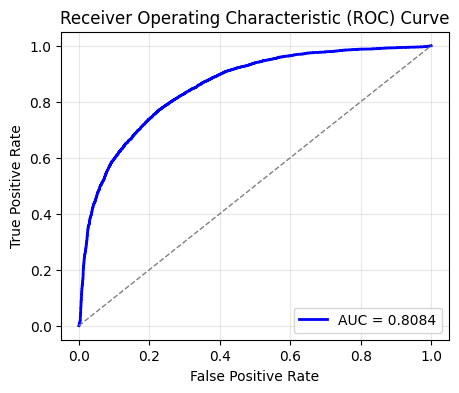

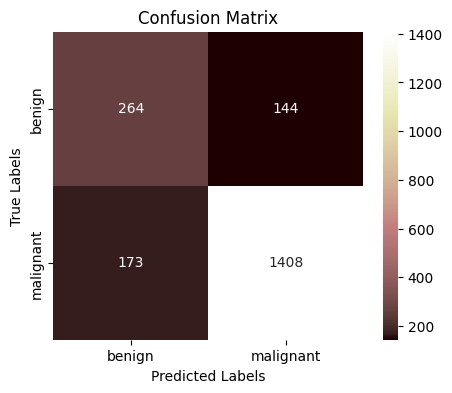

In [34]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()   
plot_auc(fpr, tpr, test_auc)

import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(cm, class_names=['benign', 'malignant'])    

resnet 50

In [52]:
import torch
import torchvision.models as models

# For ResNet18
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()  # Set the model to evaluation mode
print("ResNet50 Model:")
print(resnet50)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet50 Model:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1,

In [53]:
import torch

import torch.nn as nn

import torchvision.models as models

In [54]:
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = models.resnet50(pretrained=True)
        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.features = model_resnet50.fc.in_features
        self.fc = nn.Linear(self.features, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [55]:
model = Resnet50()

print(model)

Resnet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

next run 
1 early stop
2 train fun
3 val fun

In [63]:
import torch.nn as nn
total_epochs = 50
lr = 0.01
momentum = 0.9
no_cuda = False
num_classes=2
log_interval = 10
l2_decay = 0.01
#model = customVGG16(num_classes=num_classes)
model = Resnet50(num_classes=num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

In [64]:
import os
from IPython.display import FileLink

# Model training
model.to(device)  

best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)

project_name = 'tumor_classification_3'
model_name = 'resnet50'

# Set Kaggle working directory
os.chdir(r'/kaggle/working')

for epoch in range(1, total_epochs + 1):
    # Training step
    train(epoch, model, total_epochs, train_loader, criterion, l2_decay)

    # Validation step
    with torch.no_grad():
        test_loss, accuracy, cm, auc = validation(model, val_loader)

    # Handle model state for single/multiple GPUs
    model_state_dict = model.module.state_dict() if isinstance(model, nn.parallel.DistributedDataParallel) else model.state_dict()

    # Save directory for models
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    # Early stopping check
    early_stop(test_loss, model)

    # Save the best model based on AUC
    if auc > best_accuracy:
        best_accuracy = auc
        model_save_path = os.path.join(model_save_dir, f'{model_name}_epoch_{epoch}.pth')
        torch.save(model_state_dict, model_save_path, _use_new_zipfile_serialization=False)
        print(f"Model saved at: {os.path.abspath(model_save_path)}")

        # Generate download link for Kaggle
        print("Generating download link for the saved model...")
        display(FileLink(model_save_path))

    # Stop training if early stopping is triggered
    if early_stop.early_stop:
        print("Early stopping")
        break

# Save the model at the final epoch if early stopping is triggered
final_model_save_path = os.path.join(model_save_dir, f'{model_name}_final_epoch.pth')
torch.save(model_state_dict, final_model_save_path, _use_new_zipfile_serialization=False)
print(f"Final model saved at: {os.path.abspath(final_model_save_path)}")

# Generate download link for the final model
print("Generating download link for the final model...")
display(FileLink(final_model_save_path))


Epoch 2/50:  47%|████▋     | 299/639 [01:17<01:26,  3.91batch/s]

Specificity: 1.0000, Sensitivity: 0.0010, AUC: 0.9208

Test set: Average loss: 0.3608, Accuracy: 83.36%

Validation loss decreased (inf --> 0.360777). Saving model...
Model saved at: /kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_1.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_1.pth

Epoch 3/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]


train accuracy: 84.04619598388672%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.5886

Test set: Average loss: 0.7599, Accuracy: 50.58%

EarlyStopping counter: 1 out of 20


Epoch 4/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 82.80806732177734%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7872

Test set: Average loss: 0.5384, Accuracy: 67.82%

EarlyStopping counter: 2 out of 20


Epoch 5/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]


train accuracy: 81.28609466552734%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6439

Test set: Average loss: 0.7001, Accuracy: 58.17%

EarlyStopping counter: 3 out of 20


Epoch 6/50: 100%|██████████| 639/639 [02:45<00:00,  3.87batch/s]


train accuracy: 80.91905975341797%
Specificity: 0.9995, Sensitivity: 0.0000, AUC: 0.6265

Test set: Average loss: 0.9081, Accuracy: 60.99%

EarlyStopping counter: 4 out of 20


Epoch 7/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 80.53733825683594%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8718

Test set: Average loss: 0.4547, Accuracy: 78.33%

EarlyStopping counter: 5 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 80.4345703125%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8319

Test set: Average loss: 0.4932, Accuracy: 73.00%

EarlyStopping counter: 6 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 80.4884033203125%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8918

Test set: Average loss: 0.4075, Accuracy: 77.83%

EarlyStopping counter: 7 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]


train accuracy: 80.34648132324219%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8836

Test set: Average loss: 0.4339, Accuracy: 81.05%

EarlyStopping counter: 8 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 84.73133087158203%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9087

Test set: Average loss: 0.3810, Accuracy: 81.45%

EarlyStopping counter: 9 out of 20


Epoch 12/50: 100%|██████████| 639/639 [02:45<00:00,  3.87batch/s]


train accuracy: 86.21904754638672%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9387

Test set: Average loss: 0.3144, Accuracy: 83.31%

Validation loss decreased (0.360777 --> 0.314363). Saving model...
Model saved at: /kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_11.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_11.pth

Epoch 13/50: 100%|██████████| 639/639 [02:49<00:00,  3.77batch/s]


train accuracy: 86.88949584960938%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9370

Test set: Average loss: 0.3182, Accuracy: 82.30%

EarlyStopping counter: 1 out of 20


Epoch 14/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]


train accuracy: 87.7263412475586%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9389

Test set: Average loss: 0.3137, Accuracy: 85.37%

Validation loss decreased (0.314363 --> 0.313726). Saving model...
Model saved at: /kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_13.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_13.pth

Epoch 15/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]


train accuracy: 87.89762115478516%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9039

Test set: Average loss: 0.3859, Accuracy: 79.19%

EarlyStopping counter: 1 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]


train accuracy: 87.97103118896484%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9286

Test set: Average loss: 0.3431, Accuracy: 84.36%

EarlyStopping counter: 2 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:42<00:00,  3.92batch/s]


train accuracy: 88.5338134765625%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9521

Test set: Average loss: 0.2765, Accuracy: 85.22%

Validation loss decreased (0.313726 --> 0.276504). Saving model...
Model saved at: /kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_16.pth
Generating download link for the saved model...


/kaggle/working/model/tumor_classification_3/resnet50/resnet50_epoch_16.pth

Epoch 18/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]


train accuracy: 88.44083404541016%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9309

Test set: Average loss: 0.3452, Accuracy: 84.67%

EarlyStopping counter: 1 out of 20


Epoch 19/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]


train accuracy: 88.89595794677734%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9028

Test set: Average loss: 0.3969, Accuracy: 79.89%

EarlyStopping counter: 2 out of 20


Epoch 20/50: 100%|██████████| 639/639 [02:42<00:00,  3.92batch/s]


train accuracy: 88.95957946777344%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9212

Test set: Average loss: 0.3576, Accuracy: 83.61%

EarlyStopping counter: 3 out of 20


Epoch 21/50: 100%|██████████| 639/639 [02:45<00:00,  3.86batch/s]


train accuracy: 90.97582244873047%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9411

Test set: Average loss: 0.3108, Accuracy: 85.37%

EarlyStopping counter: 4 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:46<00:00,  3.85batch/s]


train accuracy: 91.70500183105469%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9451

Test set: Average loss: 0.3030, Accuracy: 86.32%

EarlyStopping counter: 5 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]


train accuracy: 92.09650421142578%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9257

Test set: Average loss: 0.3560, Accuracy: 84.62%

EarlyStopping counter: 6 out of 20


Epoch 24/50: 100%|██████████| 639/639 [02:45<00:00,  3.86batch/s]


train accuracy: 92.1748046875%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9366

Test set: Average loss: 0.3382, Accuracy: 85.52%

EarlyStopping counter: 7 out of 20


Epoch 25/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 92.49779510498047%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9373

Test set: Average loss: 0.3293, Accuracy: 85.17%

EarlyStopping counter: 8 out of 20


Epoch 26/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]


train accuracy: 92.10629272460938%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9336

Test set: Average loss: 0.3412, Accuracy: 85.32%

EarlyStopping counter: 9 out of 20


Epoch 27/50: 100%|██████████| 639/639 [02:48<00:00,  3.79batch/s]


train accuracy: 92.60057067871094%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9391

Test set: Average loss: 0.3264, Accuracy: 85.62%

EarlyStopping counter: 10 out of 20


Epoch 28/50: 100%|██████████| 639/639 [02:45<00:00,  3.86batch/s]


train accuracy: 92.7816390991211%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9238

Test set: Average loss: 0.3732, Accuracy: 83.66%

EarlyStopping counter: 11 out of 20


Epoch 29/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]


train accuracy: 92.81100463867188%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9202

Test set: Average loss: 0.3663, Accuracy: 83.16%

EarlyStopping counter: 12 out of 20


Epoch 30/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 93.16825103759766%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9274

Test set: Average loss: 0.3639, Accuracy: 85.37%

EarlyStopping counter: 13 out of 20


Epoch 31/50: 100%|██████████| 639/639 [02:42<00:00,  3.92batch/s]


train accuracy: 93.56954193115234%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9328

Test set: Average loss: 0.3489, Accuracy: 85.47%

EarlyStopping counter: 14 out of 20


Epoch 32/50: 100%|██████████| 639/639 [02:46<00:00,  3.84batch/s]


train accuracy: 93.69677734375%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9320

Test set: Average loss: 0.3530, Accuracy: 84.92%

EarlyStopping counter: 15 out of 20


Epoch 33/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]


train accuracy: 93.30038452148438%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9323

Test set: Average loss: 0.3563, Accuracy: 85.02%

EarlyStopping counter: 16 out of 20


Epoch 34/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]


train accuracy: 93.59400939941406%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9320

Test set: Average loss: 0.3558, Accuracy: 85.37%

EarlyStopping counter: 17 out of 20


Epoch 35/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]


train accuracy: 93.50102996826172%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9226

Test set: Average loss: 0.3835, Accuracy: 83.91%

EarlyStopping counter: 18 out of 20


Epoch 37/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]


train accuracy: 93.60379791259766%
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9308

Test set: Average loss: 0.3641, Accuracy: 84.97%

EarlyStopping counter: 20 out of 20
Early stopping
Final model saved at: /kaggle/working/model/tumor_classification_3/resnet50/resnet50_final_epoch.pth
Generating download link for the final model...


/kaggle/working/model/tumor_classification_3/resnet50/resnet50_final_epoch.pth

In [65]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve

import torch

import numpy as np

import torch.nn.functional as F



def test(model, test_loader):
    name = 'test'
    len_test_loader = len(test_loader.dataset)
    model.eval()

    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    true_labels = []  # Collect true labels here
    class_names = ['benign', 'malignant']

    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()

        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())  # Collect predictions
        true_labels.extend(target.cpu().numpy())  # Collect true labels

        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Ensure all_predictions and true_labels are flattened
    all_predictions = np.array(all_predictions)
    true_labels = np.array(true_labels)

    # Classification metrics -> accuracy, F1 score
    print(metrics.classification_report(true_labels, all_predictions, target_names=class_names, digits=4))

    # Confusion matrix
    cm = metrics.confusion_matrix(true_labels, all_predictions)
    print("\nConfusion Matrix:\n", cm)

    # ROC Curve and AUC
    num_classes = len(class_names)
    label_onehot = np.eye(num_classes)[true_labels.astype(int)]
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = roc_auc_score(label_onehot, possibilities, average="macro")

    # Specificity, Sensitivity, AUC
    test_loss /= len_test_loader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_loader, 100. * correct / len_test_loader))

    #return 100. * correct / len_test_loader, test_loss, auc_value
    return 100. * correct / len_test_loader, test_loss, auc_value, fpr, tpr



In [47]:
test_accuracy, test_loss, test_auc, fpr, tpr = test(model, test_loader)

              precision    recall  f1-score   support

      benign     0.5913    0.4912    0.5366      1938
   malignant     0.8119    0.8661    0.8381      4913

    accuracy                         0.7600      6851
   macro avg     0.7016    0.6786    0.6874      6851
weighted avg     0.7495    0.7600    0.7528      6851


Confusion Matrix:
 [[ 952  986]
 [ 658 4255]]
Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7912

test set: Average loss: 0.6254, Accuracy: 5207/6851 (76.00%)



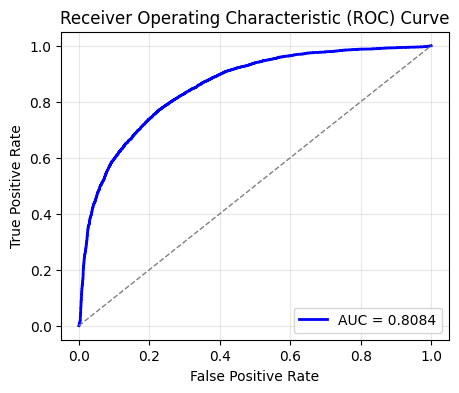

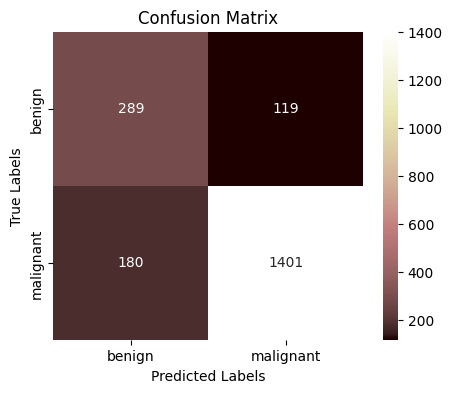

In [66]:
import matplotlib.pyplot as plt

def plot_auc(fpr, tpr, auc_value):
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()   
plot_auc(fpr, tpr, test_auc)

import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(cm, class_names=['benign', 'malignant'])    